<img height="100" width="420" src="https://rnao.ca/sites/rnao-ca/files/iStock_000022902889Small.jpg"></img>
# <font color= "red" > Diebetes_ Case_Study_Machine_Learning</font>
##  <u>Decision Trees & Random Forest</u>: Machine Learning Model


<h1><font color='Orange'> Table of Contents </h1></font>

1. [Dataset Description](#columns)
2. [Importing the packages and dataset](#packages)
3. [Exploratory Data Analysis](#eda)
4. [Feature Engineering](#feature)
5. [Building and Evaluating Models](#modelling)

7. [Findings](#finding)
     

<p1>
<h3></h3> The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. <br>Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
</p1><br>

### 1. Dataset Description  <a id='columns'>

The dataset consists of 768 individuals with 10 feature column.Based on the parameter it have outcome column which represents the indivisual is diebetics or not.Below are the all column description of the given datasets.<br>

- **outcome** : Class variable (0 or 1)
- **DiabetesPedigreeFunction** :  Diabetes pedigree function
- **BMI** :Body mass index (weight in kg/(height in m)^2)
- **Age** : Age (years)
- **Insulin** : 2-Hour serum insulin (mu U/ml)
- **SkinThickness** :Triceps skin fold thickness (mm) 
- **BloodPressure** :Diastolic blood pressure (mm Hg) 
- **Glucose** : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **Pregnancies** : Number of times pregnant 

<h2>The main aim to perform <u>EDA, Visualization, and build the model using Decision Tree & Random Forest Algorith</u> to predict the result with best accuracy.</u>


### 2.Importing the packages and datase <a id="packages">

In [1]:
# importing necessary packages for Analysis
%matplotlib inline
import pandas_profiling as pds
import numpy as np
import pandas as pd
%pylab inline
import time
import os

# importing necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# importing necessary libraries for building the models
from sklearn.preprocessing import Imputer
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier

C:\Users\Mowgli\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Mowgli\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Mowgli\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Mowgli\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Mowgli\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Mowgli\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 497, in start
    self.io_loop.start()
  File "C:\Use

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Loading the datasets
data_df= pd.read_csv("Diabetes_data.csv")
data_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1


In [3]:
# The total numbers of "Rows" and "Columns of the Datasets"
data_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=2)

In [5]:
# To check out of total entries how many are non-null
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     766 non-null float64
BloodPressure               767 non-null float64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    767 non-null float64
Age                         767 non-null float64
Outcome                     768 non-null int64
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [6]:
data_df.isna().sum()

Pregnancies                 0
Glucose                     2
BloodPressure               1
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         1
Outcome                     0
dtype: int64

### 4.Feature Engineering
#### Removing and cleaning the datasets so that all columns have equal no of entries


In [7]:
data_df=data_df.fillna(0)
y=data_df['Outcome']

columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
feature_cols=data_df[list(columns)].values

imp= Imputer(missing_values='NaN',strategy="mean",axis=0)
X=imp.fit_transform(feature_cols)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null int64
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


C:\Users\Mowgli\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### Describing the datasets and visualization

In [8]:
data_df.describe(include= "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.598958,69.001302,20.536458,79.799479,31.992578,0.471246,33.208333,0.348958
std,3.369578,32.555208,19.511739,15.952218,115.244002,7.884160,0.331766,11.817532,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.242500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.370500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BA87278>,
      dtype=object)

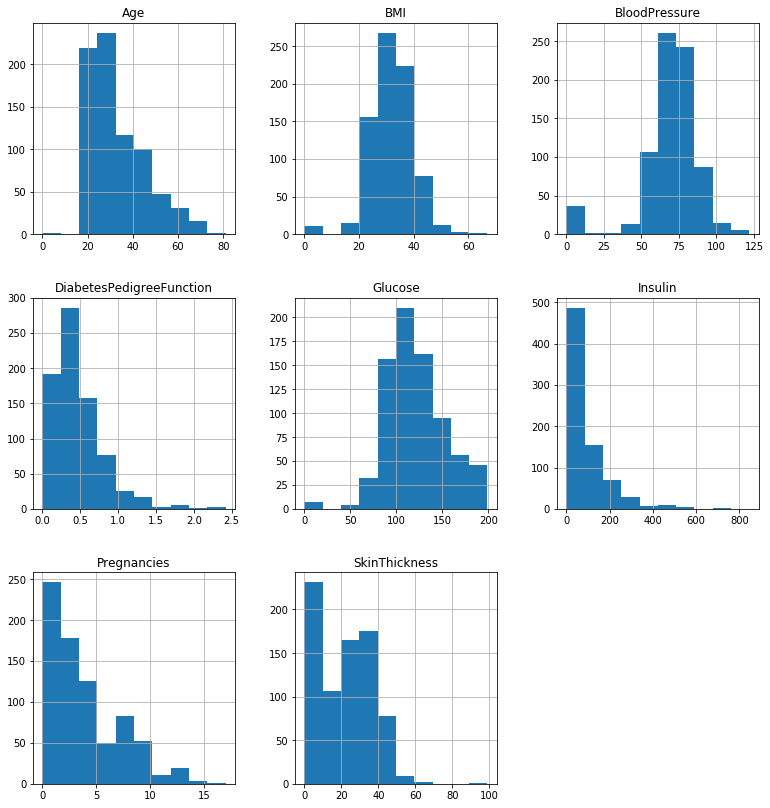

In [9]:
# ploting the histograms for all feature column 'X'
data_df[columns].hist(figsize=(13,14))

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

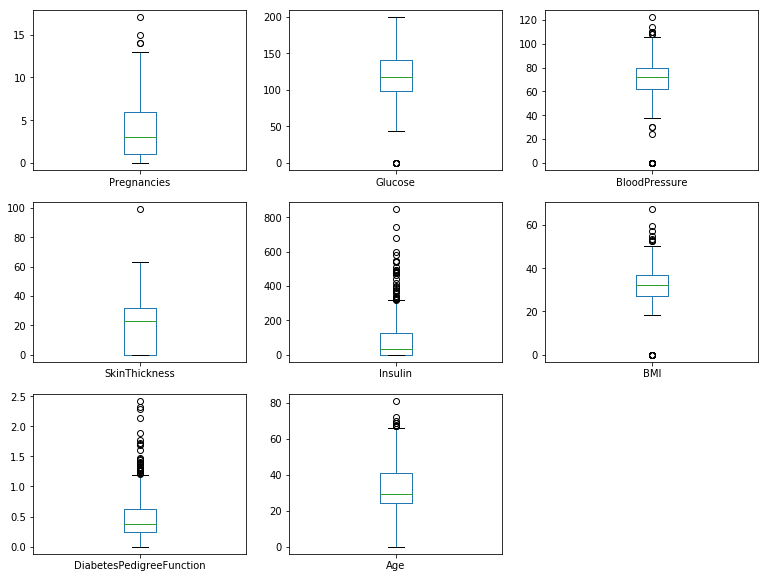

In [10]:
# Box Plot Visualization to understand the mean,quantile and outlier values in the feature columns "X"
data_df[columns].plot(kind='box',subplots=True, sharex=False, sharey=False,layout=(3,3),figsize=(13,10))

# Principal Component Analysis- Dimentionality Reduction

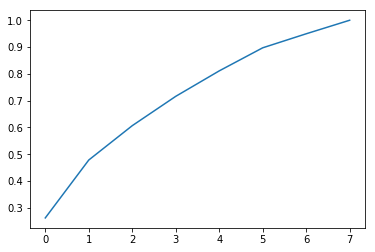

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X=ss.fit_transform(X)
pca=PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [12]:
pca_df= PCA(n_components=5)
new_X=pca_df.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train,X_test,y_train,y_test=train_test_split(new_X,y,test_size=0.30,random_state=123)

# Implementing LDA for feature Engineering

In [14]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#lda=LinearDiscriminantAnalysis()
#model=lda.fit(X_train,y_train)
#model.explained_variance_ratio_

In [15]:
#prd=model.predict(X_test)
#print(accuracy_score(y_test,prd))
#print(confusion_matrix(y_test,prd))  

#X_train=lda.transform(X_train)
#X_test=lda.transform(X_test)

In [47]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {}'.format(y_train.shape))
print("Before OverSampling, the shape of  X_test:{}", X_test.shape)
print("Before OverSampling, the shape of  X_test:{}", y_test.shape)

Before OverSampling, the shape of train_X: (537, 5)
Before OverSampling, the shape of train_y: (537,)
Before OverSampling, the shape of  X_test:{} (231, 5)
Before OverSampling, the shape of  X_test:{} (231,)


In [17]:
sm= SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

# Handling Imbalance Datasets

In [20]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("\n")

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("\n")
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 180
Before OverSampling, counts of label '0': 357


After OverSampling, the shape of train_X: (714, 5)
After OverSampling, the shape of train_y: (714,) 



After OverSampling, counts of label '1': 357
After OverSampling, counts of label '0': 357


# Logistic Regression Model


Time taken to train the model variables is 0.003999948501586914sec.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

The Acuracy of the Model from Logistics Regression is :::: 77.05627705627705


              precision    recall  f1-score   support

           0       0.84      0.78      0.81       143
           1       0.68      0.76      0.72        88

   micro avg       0.77      0.77      0.77       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.78      0.77      0.77       231



C:\Users\Mowgli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


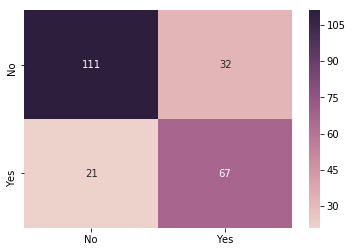

In [21]:
from sklearn.linear_model import LogisticRegression

mylogis= LogisticRegression()
start=time.time()
model1=mylogis.fit(X_train_res,y_train_res)
end=time.time()
training_time_after_Logistics=end-start
print("\nTime taken to train the model variables is {}sec.".format(training_time_after_Logistics))
print("\n")

predict1=mylogis.predict(X_test)
print(model1)

print("\nThe Acuracy of the Model from Logistics Regression is ::::", (accuracy_score(y_test,predict1))*100)
print("\n")
print(classification_report(y_test,predict1))

conf=confusion_matrix(y_test, predict1)
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

# Decision Tree Model

[('Pregnancies', 0.48520343566518664), ('Glucose', 0.1259838188565166), ('BloodPressure', 0.22448638772572596), ('SkinThickness', 0.029923217982024256), ('Insulin', 0.13440313977054652)]



Time taken to train the model is 0.01000070571899414sec.


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')


The Acuuracy of the Model from Decision Tree is :::: 72.2943722943723


              precision    recall  f1-score   support

           0       0.86      0.66      0.75       143
           1       0.60      0.82      0.69        88

   micro avg       0.72      0.72      0.72       231
   macro avg       0.73      0.74      0.72       231
weighted avg       0.76      0.72      0.73       231



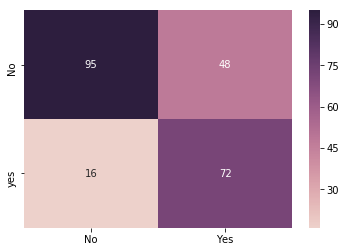

In [22]:
my_tree= tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=123)
start=time.time()
DT=my_tree.fit(X_train_res,y_train_res)
end= time.time()

print(list(zip(columns,DT.feature_importances_)))  ## Fetching out the Information Gain Value of Feature columns X
print("\n")

training_time_after_Decision_tree=end-start
print("\nTime taken to train the model is {}sec.".format(training_time_after_Decision_tree))
print("\n")

print(DT)
predict2=DT.predict(X_test)
print("\n\nThe Acuuracy of the Model from Decision Tree is ::::",(accuracy_score(y_test,predict2)*100))
print("\n")
print(classification_report(y_test,predict2))

conf1=confusion_matrix(y_test,predict2)
cmap=sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf1,cmap=cmap,xticklabels=['No','Yes'],yticklabels=['No','yes'],annot=True,fmt="d")

# SVC

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)



The Acuuracy of the Model from Support Vector Machine is :::: 75.32467532467533


              precision    recall  f1-score   support

           0       0.84      0.75      0.79       143
           1       0.65      0.76      0.70        88

   micro avg       0.75      0.75      0.75       231
   macro avg       0.74      0.75      0.75       231
weighted avg       0.77      0.75      0.76       231



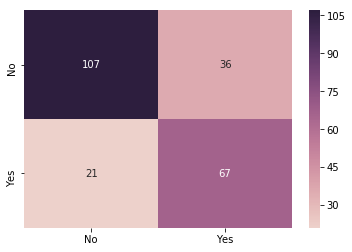

In [23]:
from sklearn.svm import SVC
Svector=SVC(kernel='linear', decision_function_shape='ovr')
SV=Svector.fit(X_train_res,y_train_res)

print(SV)
print("\n")

predict3=SV.predict(X_test)
print("\nThe Acuuracy of the Model from Support Vector Machine is ::::",(accuracy_score(y_test,predict3)*100))
print("\n")
print(classification_report(y_test,predict3))

conf2=confusion_matrix(y_test,predict3)
cmap=sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf2,cmap=cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True,fmt="d")

# Random Forest Classifier


The Acuuracy of the Model from Random Forest is :::: 74.45887445887446


              precision    recall  f1-score   support

           0       0.82      0.75      0.78       143
           1       0.64      0.74      0.69        88

   micro avg       0.74      0.74      0.74       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.75      0.74      0.75       231



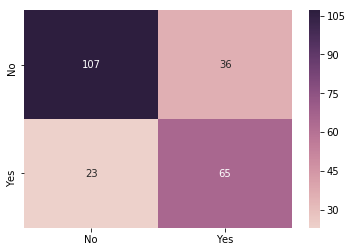

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 25,
                                min_samples_split=2, 
                                n_estimators = 100, random_state = 1)
my_forest = forest.fit(X_train_res,y_train_res)
train_pred = my_forest.predict(X_test)
print("\nThe Acuuracy of the Model from Random Forest is ::::",(accuracy_score(y_test,train_pred)*100))
print("\n")
print(classification_report(y_test,train_pred))

conf2=confusion_matrix(y_test,train_pred)
cmap=sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf2,cmap=cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True,fmt="d")

# XGBoosting Implementation

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

Cv_param={'max_depth':[1,5,7],'min_child_weight':[1,3,5]}
ind_param ={'learning_rate':0.1,'n_estimator':1000,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'binary:logistic'}

optimized_GBM=GridSearchCV(XGBClassifier(**ind_param),Cv_param,scoring='accuracy',cv=5,n_jobs=-1)

In [33]:
%time optimized_GBM.fit(X_train_res,y_train_res)

Wall time: 3.67 s


C:\Users\Mowgli\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimator=1000,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [34]:
optimized_GBM.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimator=1000,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8)

In [36]:
import xgboost
xgdmat=xgboost.DMatrix(X_train_res,y_train_res)

In [38]:
Xg_param={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'binary:logistic','max_depth':7,'min_child_weight':1}
%time cv_xgb=xgboost.cv(params=Xg_param,dtrain=xgdmat,num_boost_round=3000,nfold=5,metrics=['error'],early_stopping_rounds=100)

[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[01:34:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[01:34:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[01:34:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[01:34:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[01:34:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=7
[01:34:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=7
[01:34:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=7
[01:34:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [39]:
cv_xgb.tail(5)

,train-error-mean,train-error-std,test-error-mean,test-error-std
46,0.029762,0.005759,0.250556,0.058209
47,0.028712,0.006128,0.250556,0.056504
48,0.026961,0.007056,0.249168,0.052424
49,0.026260,0.006550,0.247759,0.054970
50,0.026259,0.006354,0.246370,0.056182


### Training Xgboost model

In [40]:
Xg_param={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'binary:logistic','max_depth':7,'min_child_weight':1}
final_xg=xgboost.train(Xg_param,xgdmat,num_boost_round=50)

[01:40:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[01:40:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[01:40:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[01:40:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=7
[01:40:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[01:40:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[01:40:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

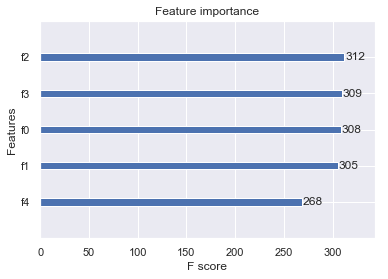

In [56]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.0)
xgboost.plot_importance(final_xg)

### Testing the datasets with XGBoost Model

In [45]:
testdata=xgboost.DMatrix(X_test)
y_predictXg=final_xg.predict(testdata)


In [48]:
y_predictXg[y_predictXg>0.5]=1
y_predictXg[y_predictXg<=0.5]=0


The Acuuracy of the Model from XGBoost is :::: 74.89177489177489


              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79       139
         1.0       0.69      0.66      0.68        92

   micro avg       0.75      0.75      0.75       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.75      0.75      0.75       231



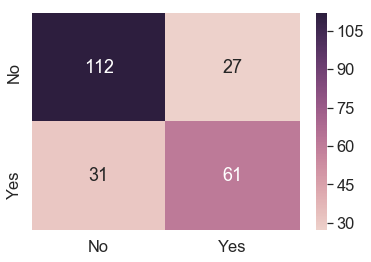

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predictXg,y_test),1-accuracy_score(y_predictXg, y_test)

print("\nThe Acuuracy of the Model from XGBoost is ::::",(accuracy_score(y_predictXg,y_test)*100))
print("\n")
print(classification_report(y_predictXg,y_test))

conf2=confusion_matrix(y_predictXg,y_test)
cmap=sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf2,cmap=cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True,fmt="d")

# ROC Curve Ploting

C:\Users\Mowgli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


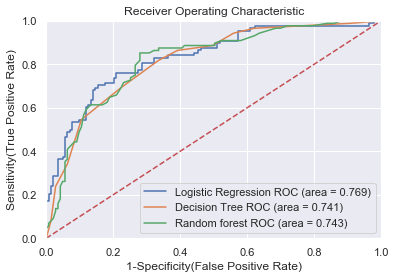

In [57]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': mylogis,
},
    
{
    'label': 'Decision Tree',
    'model': DT,
},

{
    'label':'Random forest',
    'model': my_forest,
}
  
]


for m in models:
    model = m['model'] # select the model
    model.fit(X_train_res, y_train_res) # train the model
    y_pred=model.predict(X_test) # predict the test data
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])# Compute False postive rate, and True positive rate

    auc = roc_auc_score(y_test,model.predict(X_test))# Calculate Area under the curve to display on the plot

    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m['label'], auc)) #plot the computed values
    # Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

## </h2 >Findings: <h2/> From the above Curve, we see that Logistic Regression provides the best the best AUC(~ 1), thus Logistic Regression is suitable models.